In [7]:
# import libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# load dataset and check info on the columns
df=pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# drop non-informative columns
df=df.drop(columns=['Id'],axis=1)
df=df.drop(columns=['MiscFeature'],axis=1)
df=df.drop(columns=['MiscVal'],axis=1)

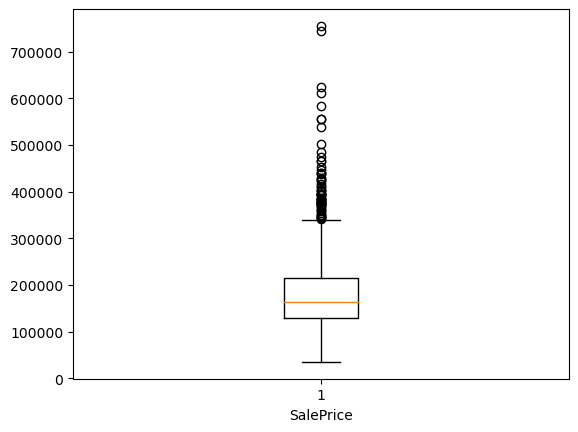

In [10]:
# describe and make a boxplot of price (y), there are outliers
# df.SalePrice.describe()
plt.boxplot(df.SalePrice)
plt.xlabel('SalePrice')
plt.show()

In [11]:
# many nans to be handled (I decided to leave the columns with many nans since they are informative and may influence the price)
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [12]:
# the list of columns with nans
cols=list(df.columns[df.isna().any()])
cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence']

In [13]:
# fillna with medians (for numerical data) and most frequent (for categorical data)
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].value_counts().index[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt']=df['GarageYrBlt'].astype(int)
df['MasVnrArea']=df['MasVnrArea'].astype(int)
df['LotFrontage']=df['LotFrontage'].astype(int)

In [14]:
# the rest of the columns with nans are categorical and I'll group them to make the further treatment
list_cat_cols=list(df.columns[df.isna().any()])
for i in range(len(list_cat_cols)):
    df[list_cat_cols[i]]=df[list_cat_cols[i]].replace(np.nan, 'Zut')
    df[list_cat_cols[i]]=df[list_cat_cols[i]].astype('category')
    df[list_cat_cols[i]]=df[list_cat_cols[i]].cat.codes

In [15]:
# grouping the object columns to change them into categorical and then make coding to change the datatype to numerical
object_columns = list(df.select_dtypes(include=['object']).columns)
df1=df.select_dtypes(include=['object']).apply(lambda x: x.astype('category'))
df1=df1.apply(lambda x: x.cat.codes)
df.drop(columns=object_columns,axis=1,inplace=True)
df3=pd.concat([df,df1],axis=1)
df3.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
Alley            0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrType       0
MasVnrArea       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MoSold           0
YrSold           0
SalePrice        0
MSZoning         0
Street           0
LotShape    

In [16]:
# permutation of the data and splitting into x and y
dfr=pd.DataFrame(np.random.permutation(df3.values),columns=df3.columns)
x=dfr.loc[:,df3.columns!='SalePrice']
y=dfr.loc[:,df3.columns=='SalePrice']

In [17]:
# define rmse function 
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [18]:
# train_test split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [19]:
# standardize x data
scaler=StandardScaler()
scaler.fit(x)
X=scaler.transform(x)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
# tf.cast y to float32
Y=tf.cast(y, tf.float32)
Y_train=tf.cast(Y_train, tf.float32)
Y_test=tf.cast(Y_test, tf.float32)

In [21]:
# I've experimented with Sequential and Functional APIs, with different functions, and the last works better
# further I'll use the Functional APIs model with Relu function to build wide and deep neural networks
# Hidden1 layer is acting as a function where the input layer is passed on the output of the hidden1 is passed on to Hidden2
# Concat layer concatenates input layer and the output of the Hidden2 layer
# in the output layer, we have the raw input and transformed input by Hidden1&Hidden2 layers concatenated together
# because this is a regression problem, there will be only one output here
input = tf.keras.layers.Input(shape = X.shape[1:])
hidden1 = tf.keras.layers.Dense(300, activation='relu')(input)
hidden2 = tf.keras.layers.Dense(300, activation='relu')(hidden1)
concat = tf.keras.layers.Concatenate()([input, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model_final = tf.keras.models.Model(inputs=[input], outputs=[output])

In [22]:
# compilation of the model using rmse as loss, adam optimizer, and evaluation metric as rmse again
model_final.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

In [23]:
# running the model for 2000 epochs
final = model_final.fit(X, Y, epochs=2000, validation_data=(X_test, Y_test))

Epoch 1/2000
46/46 [==============================] - 1s 6ms/step - loss: 196568.7500 - rmse: 197337.2969 - val_loss: 190927.2812 - val_rmse: 188741.0938
Epoch 2/2000
46/46 [==============================] - 0s 2ms/step - loss: 196154.4062 - rmse: 195954.3906 - val_loss: 189800.3750 - val_rmse: 187679.8594
Epoch 3/2000
46/46 [==============================] - 0s 2ms/step - loss: 193366.7500 - rmse: 193222.6562 - val_loss: 185742.6562 - val_rmse: 183880.3281
Epoch 4/2000
46/46 [==============================] - 0s 2ms/step - loss: 186892.0938 - rmse: 186694.4062 - val_loss: 176494.2500 - val_rmse: 175240.9062
Epoch 5/2000
46/46 [==============================] - 0s 2ms/step - loss: 173783.2188 - rmse: 173694.9531 - val_loss: 160251.4062 - val_rmse: 160067.4219
Epoch 6/2000
46/46 [==============================] - 0s 2ms/step - loss: 153021.5312 - rmse: 153034.1406 - val_loss: 137325.2812 - val_rmse: 138622.1719
Epoch 7/2000
46/46 [==============================] - 0s 2ms/step - loss: 12

46/46 [==============================] - 0s 2ms/step - loss: 29545.6719 - rmse: 29531.5762 - val_loss: 24915.5273 - val_rmse: 26895.1055
Epoch 56/2000
46/46 [==============================] - 0s 2ms/step - loss: 29638.0605 - rmse: 29540.6230 - val_loss: 24661.9082 - val_rmse: 26501.1191
Epoch 57/2000
46/46 [==============================] - 0s 2ms/step - loss: 29403.6523 - rmse: 29403.5078 - val_loss: 24710.8398 - val_rmse: 26623.0410
Epoch 58/2000
46/46 [==============================] - 0s 2ms/step - loss: 29234.7402 - rmse: 29191.5156 - val_loss: 24377.4863 - val_rmse: 26245.0371
Epoch 59/2000
46/46 [==============================] - 0s 2ms/step - loss: 29077.8418 - rmse: 29115.2441 - val_loss: 24270.9570 - val_rmse: 26218.1973
Epoch 60/2000
46/46 [==============================] - 0s 3ms/step - loss: 28671.5020 - rmse: 28613.2090 - val_loss: 24128.9980 - val_rmse: 26137.3164
Epoch 61/2000
46/46 [==============================] - 0s 2ms/step - loss: 28597.0430 - rmse: 28594.3965 - v

46/46 [==============================] - 0s 2ms/step - loss: 23884.9844 - rmse: 23855.3184 - val_loss: 19036.5898 - val_rmse: 20161.1348
Epoch 110/2000
46/46 [==============================] - 0s 2ms/step - loss: 23780.8770 - rmse: 23823.9648 - val_loss: 18907.3848 - val_rmse: 20012.6289
Epoch 111/2000
46/46 [==============================] - 0s 2ms/step - loss: 23477.4746 - rmse: 23398.7637 - val_loss: 18921.1289 - val_rmse: 20012.6953
Epoch 112/2000
46/46 [==============================] - 0s 2ms/step - loss: 23815.1777 - rmse: 23773.4043 - val_loss: 18831.9512 - val_rmse: 19924.0664
Epoch 113/2000
46/46 [==============================] - 0s 2ms/step - loss: 23817.5508 - rmse: 23804.0996 - val_loss: 18755.1777 - val_rmse: 19911.3047
Epoch 114/2000
46/46 [==============================] - 0s 2ms/step - loss: 23526.6133 - rmse: 23487.4922 - val_loss: 18755.0742 - val_rmse: 19794.6328
Epoch 115/2000
46/46 [==============================] - 0s 2ms/step - loss: 23546.2539 - rmse: 23535.33

Epoch 163/2000
46/46 [==============================] - 0s 2ms/step - loss: 21193.9902 - rmse: 21130.7891 - val_loss: 16237.0801 - val_rmse: 16664.1523
Epoch 164/2000
46/46 [==============================] - 0s 2ms/step - loss: 21290.8770 - rmse: 21413.7793 - val_loss: 16169.6973 - val_rmse: 16592.6836
Epoch 165/2000
46/46 [==============================] - 0s 2ms/step - loss: 20687.7207 - rmse: 20690.6934 - val_loss: 16163.0449 - val_rmse: 16543.7461
Epoch 166/2000
46/46 [==============================] - 0s 2ms/step - loss: 20805.1641 - rmse: 20918.1934 - val_loss: 16159.3496 - val_rmse: 16557.8379
Epoch 167/2000
46/46 [==============================] - 0s 2ms/step - loss: 20640.9570 - rmse: 20820.3320 - val_loss: 16151.9229 - val_rmse: 16459.0039
Epoch 168/2000
46/46 [==============================] - 0s 2ms/step - loss: 20904.6973 - rmse: 20848.3809 - val_loss: 16098.5938 - val_rmse: 16424.5352
Epoch 169/2000
46/46 [==============================] - 0s 2ms/step - loss: 20854.2031 -

Epoch 217/2000
46/46 [==============================] - 0s 2ms/step - loss: 18939.6465 - rmse: 18867.2754 - val_loss: 14654.9863 - val_rmse: 14637.4121
Epoch 218/2000
46/46 [==============================] - 0s 2ms/step - loss: 19040.4023 - rmse: 19017.5469 - val_loss: 14789.3115 - val_rmse: 14752.5938
Epoch 219/2000
46/46 [==============================] - 0s 2ms/step - loss: 19080.6230 - rmse: 19160.5059 - val_loss: 14543.1133 - val_rmse: 14570.3096
Epoch 220/2000
46/46 [==============================] - 0s 2ms/step - loss: 18611.5391 - rmse: 18612.4531 - val_loss: 14534.9814 - val_rmse: 14525.9863
Epoch 221/2000
46/46 [==============================] - 0s 2ms/step - loss: 19115.8887 - rmse: 19121.0508 - val_loss: 14897.3301 - val_rmse: 14876.5605
Epoch 222/2000
46/46 [==============================] - 0s 2ms/step - loss: 19266.0098 - rmse: 19236.2988 - val_loss: 14601.0312 - val_rmse: 14545.5889
Epoch 223/2000
46/46 [==============================] - 0s 2ms/step - loss: 19189.1621 -

Epoch 271/2000
46/46 [==============================] - 0s 2ms/step - loss: 17627.6367 - rmse: 17634.5566 - val_loss: 13613.7100 - val_rmse: 13397.7842
Epoch 272/2000
46/46 [==============================] - 0s 2ms/step - loss: 17721.3145 - rmse: 17666.0918 - val_loss: 13439.9707 - val_rmse: 13193.3564
Epoch 273/2000
46/46 [==============================] - 0s 2ms/step - loss: 17701.7305 - rmse: 17720.2363 - val_loss: 13445.0010 - val_rmse: 13198.8438
Epoch 274/2000
46/46 [==============================] - 0s 3ms/step - loss: 17614.4570 - rmse: 17607.7363 - val_loss: 13576.2656 - val_rmse: 13352.3066
Epoch 275/2000
46/46 [==============================] - 0s 2ms/step - loss: 17518.2129 - rmse: 17443.7461 - val_loss: 13377.9746 - val_rmse: 13131.0254
Epoch 276/2000
46/46 [==============================] - 0s 2ms/step - loss: 17305.8535 - rmse: 17255.1406 - val_loss: 13512.0654 - val_rmse: 13288.5547
Epoch 277/2000
46/46 [==============================] - 0s 2ms/step - loss: 17543.8047 -

Epoch 325/2000
46/46 [==============================] - 0s 2ms/step - loss: 16500.1504 - rmse: 16454.9551 - val_loss: 12625.3457 - val_rmse: 12224.1914
Epoch 326/2000
46/46 [==============================] - 0s 2ms/step - loss: 16767.4727 - rmse: 16872.1660 - val_loss: 12519.2754 - val_rmse: 12169.1699
Epoch 327/2000
46/46 [==============================] - 0s 2ms/step - loss: 16619.3867 - rmse: 16555.8145 - val_loss: 12452.1836 - val_rmse: 12023.6807
Epoch 328/2000
46/46 [==============================] - 0s 2ms/step - loss: 16181.6562 - rmse: 16190.2080 - val_loss: 12424.2646 - val_rmse: 12010.2793
Epoch 329/2000
46/46 [==============================] - 0s 2ms/step - loss: 16285.9824 - rmse: 16235.2822 - val_loss: 12367.5371 - val_rmse: 11979.9824
Epoch 330/2000
46/46 [==============================] - 0s 2ms/step - loss: 16423.2637 - rmse: 16435.3828 - val_loss: 12412.9609 - val_rmse: 12044.1680
Epoch 331/2000
46/46 [==============================] - 0s 2ms/step - loss: 16380.8271 -

Epoch 379/2000
46/46 [==============================] - 0s 2ms/step - loss: 15501.2305 - rmse: 15449.8203 - val_loss: 11674.7090 - val_rmse: 11176.3447
Epoch 380/2000
46/46 [==============================] - 0s 2ms/step - loss: 15390.0488 - rmse: 15330.2939 - val_loss: 11562.5283 - val_rmse: 11038.9971
Epoch 381/2000
46/46 [==============================] - 0s 2ms/step - loss: 15358.4736 - rmse: 15362.2773 - val_loss: 11570.0693 - val_rmse: 11074.3350
Epoch 382/2000
46/46 [==============================] - 0s 2ms/step - loss: 15118.7549 - rmse: 15059.6348 - val_loss: 11529.5664 - val_rmse: 11034.1152
Epoch 383/2000
46/46 [==============================] - 0s 2ms/step - loss: 15004.4834 - rmse: 15020.0371 - val_loss: 11536.5498 - val_rmse: 11061.5879
Epoch 384/2000
46/46 [==============================] - 0s 2ms/step - loss: 15175.4004 - rmse: 15159.7812 - val_loss: 11766.3691 - val_rmse: 11306.5811
Epoch 385/2000
46/46 [==============================] - 0s 2ms/step - loss: 14787.1904 -

Epoch 433/2000
46/46 [==============================] - 0s 2ms/step - loss: 14101.6357 - rmse: 14090.6006 - val_loss: 10911.9365 - val_rmse: 10318.8115
Epoch 434/2000
46/46 [==============================] - 0s 2ms/step - loss: 14261.7451 - rmse: 14193.9697 - val_loss: 10811.0029 - val_rmse: 10314.0059
Epoch 435/2000
46/46 [==============================] - 0s 2ms/step - loss: 13925.9766 - rmse: 13889.2422 - val_loss: 10792.7842 - val_rmse: 10218.5498
Epoch 436/2000
46/46 [==============================] - 0s 2ms/step - loss: 14146.3291 - rmse: 14191.3604 - val_loss: 10886.2812 - val_rmse: 10337.5029
Epoch 437/2000
46/46 [==============================] - 0s 2ms/step - loss: 14216.8018 - rmse: 14357.1865 - val_loss: 10863.8955 - val_rmse: 10375.3115
Epoch 438/2000
46/46 [==============================] - 0s 2ms/step - loss: 13848.3398 - rmse: 13793.5811 - val_loss: 10817.3945 - val_rmse: 10274.2969
Epoch 439/2000
46/46 [==============================] - 0s 2ms/step - loss: 14085.9492 -

46/46 [==============================] - 0s 2ms/step - loss: 12763.8633 - rmse: 12725.7939 - val_loss: 9996.2959 - val_rmse: 9501.8496
Epoch 488/2000
46/46 [==============================] - 0s 2ms/step - loss: 13045.6504 - rmse: 12978.5029 - val_loss: 9970.8584 - val_rmse: 9431.4346
Epoch 489/2000
46/46 [==============================] - 0s 3ms/step - loss: 12874.0068 - rmse: 12814.6084 - val_loss: 9985.2646 - val_rmse: 9454.5732
Epoch 490/2000
46/46 [==============================] - 0s 2ms/step - loss: 12995.5469 - rmse: 12935.7959 - val_loss: 9914.8525 - val_rmse: 9432.1836
Epoch 491/2000
46/46 [==============================] - 0s 2ms/step - loss: 12971.2422 - rmse: 12919.1465 - val_loss: 9924.5586 - val_rmse: 9409.9062
Epoch 492/2000
46/46 [==============================] - 0s 2ms/step - loss: 12795.3037 - rmse: 12765.4609 - val_loss: 9916.8379 - val_rmse: 9352.4043
Epoch 493/2000
46/46 [==============================] - 0s 2ms/step - loss: 12552.4658 - rmse: 12522.2158 - val_los

Epoch 542/2000
46/46 [==============================] - 0s 2ms/step - loss: 11856.2217 - rmse: 11803.4609 - val_loss: 9269.7578 - val_rmse: 8790.8867
Epoch 543/2000
46/46 [==============================] - 0s 2ms/step - loss: 11905.4961 - rmse: 11897.6191 - val_loss: 9152.0635 - val_rmse: 8676.7520
Epoch 544/2000
46/46 [==============================] - 0s 2ms/step - loss: 11995.4209 - rmse: 11963.4902 - val_loss: 9007.9902 - val_rmse: 8569.5537
Epoch 545/2000
46/46 [==============================] - 0s 2ms/step - loss: 11724.0928 - rmse: 11698.1885 - val_loss: 8936.8916 - val_rmse: 8515.7061
Epoch 546/2000
46/46 [==============================] - 0s 3ms/step - loss: 11985.3594 - rmse: 11949.8398 - val_loss: 8951.1494 - val_rmse: 8473.9043
Epoch 547/2000
46/46 [==============================] - 0s 2ms/step - loss: 11900.0068 - rmse: 11870.4609 - val_loss: 8962.2578 - val_rmse: 8452.5605
Epoch 548/2000
46/46 [==============================] - 0s 2ms/step - loss: 11506.0107 - rmse: 11525

46/46 [==============================] - 0s 2ms/step - loss: 11217.8037 - rmse: 11293.7334 - val_loss: 8213.7871 - val_rmse: 7751.5078
Epoch 597/2000
46/46 [==============================] - 0s 2ms/step - loss: 10952.6123 - rmse: 10979.5830 - val_loss: 8166.1274 - val_rmse: 7738.6729
Epoch 598/2000
46/46 [==============================] - 0s 2ms/step - loss: 10858.3115 - rmse: 10803.7852 - val_loss: 8053.0386 - val_rmse: 7624.2188
Epoch 599/2000
46/46 [==============================] - 0s 3ms/step - loss: 11093.9209 - rmse: 11086.5811 - val_loss: 8107.3589 - val_rmse: 7705.0298
Epoch 600/2000
46/46 [==============================] - 0s 2ms/step - loss: 10998.9385 - rmse: 10956.8174 - val_loss: 8009.3135 - val_rmse: 7552.6670
Epoch 601/2000
46/46 [==============================] - 0s 2ms/step - loss: 10975.4736 - rmse: 10961.7422 - val_loss: 8016.2036 - val_rmse: 7564.3032
Epoch 602/2000
46/46 [==============================] - 0s 2ms/step - loss: 10741.3154 - rmse: 10737.5596 - val_los

Epoch 651/2000
46/46 [==============================] - 0s 2ms/step - loss: 10003.1133 - rmse: 9998.6562 - val_loss: 7188.1997 - val_rmse: 6776.8994
Epoch 652/2000
46/46 [==============================] - 0s 2ms/step - loss: 9808.3701 - rmse: 9769.2793 - val_loss: 7098.2837 - val_rmse: 6702.4805
Epoch 653/2000
46/46 [==============================] - 0s 2ms/step - loss: 9974.6680 - rmse: 9939.4258 - val_loss: 7169.6440 - val_rmse: 6730.6748
Epoch 654/2000
46/46 [==============================] - 0s 2ms/step - loss: 9753.4297 - rmse: 9868.9746 - val_loss: 7180.6099 - val_rmse: 6774.8271
Epoch 655/2000
46/46 [==============================] - 0s 3ms/step - loss: 10037.1191 - rmse: 10023.4111 - val_loss: 7139.5596 - val_rmse: 6714.0947
Epoch 656/2000
46/46 [==============================] - 0s 3ms/step - loss: 10054.5840 - rmse: 10066.1641 - val_loss: 7149.7378 - val_rmse: 6756.9663
Epoch 657/2000
46/46 [==============================] - 0s 2ms/step - loss: 9874.6250 - rmse: 9851.7285 - v

46/46 [==============================] - 0s 2ms/step - loss: 8947.5723 - rmse: 8960.5283 - val_loss: 6517.2314 - val_rmse: 6164.7168
Epoch 707/2000
46/46 [==============================] - 0s 2ms/step - loss: 8935.7178 - rmse: 8894.2188 - val_loss: 6383.5283 - val_rmse: 6029.5337
Epoch 708/2000
46/46 [==============================] - 0s 2ms/step - loss: 8914.6963 - rmse: 8938.7285 - val_loss: 6254.4712 - val_rmse: 5951.7305
Epoch 709/2000
46/46 [==============================] - 0s 2ms/step - loss: 8806.6367 - rmse: 8848.4072 - val_loss: 6194.5010 - val_rmse: 5883.7085
Epoch 710/2000
46/46 [==============================] - 0s 2ms/step - loss: 8837.7471 - rmse: 9150.6064 - val_loss: 6190.6548 - val_rmse: 5834.2544
Epoch 711/2000
46/46 [==============================] - 0s 2ms/step - loss: 8933.8477 - rmse: 8900.9814 - val_loss: 6202.2764 - val_rmse: 5893.7495
Epoch 712/2000
46/46 [==============================] - 0s 2ms/step - loss: 8831.6660 - rmse: 8814.3496 - val_loss: 6279.0337 -

46/46 [==============================] - 0s 3ms/step - loss: 7831.8677 - rmse: 7824.2373 - val_loss: 5242.3896 - val_rmse: 4921.6260
Epoch 762/2000
46/46 [==============================] - 0s 2ms/step - loss: 7747.3237 - rmse: 7721.9082 - val_loss: 5270.7573 - val_rmse: 4967.0503
Epoch 763/2000
46/46 [==============================] - 0s 2ms/step - loss: 8083.2891 - rmse: 8094.3091 - val_loss: 5247.7944 - val_rmse: 4940.9922
Epoch 764/2000
46/46 [==============================] - 0s 2ms/step - loss: 7913.1475 - rmse: 7916.8477 - val_loss: 5274.8936 - val_rmse: 4941.8833
Epoch 765/2000
46/46 [==============================] - 0s 2ms/step - loss: 7858.0967 - rmse: 7818.4790 - val_loss: 5348.2876 - val_rmse: 4990.9131
Epoch 766/2000
46/46 [==============================] - 0s 2ms/step - loss: 7801.8027 - rmse: 7766.9131 - val_loss: 5195.2368 - val_rmse: 4844.4844
Epoch 767/2000
46/46 [==============================] - 0s 2ms/step - loss: 7751.0361 - rmse: 7719.2344 - val_loss: 5130.9624 -

46/46 [==============================] - 0s 2ms/step - loss: 6896.3081 - rmse: 6852.0708 - val_loss: 4241.7700 - val_rmse: 3943.8035
Epoch 817/2000
46/46 [==============================] - 0s 2ms/step - loss: 6809.4170 - rmse: 6775.5830 - val_loss: 4416.7720 - val_rmse: 4132.4780
Epoch 818/2000
46/46 [==============================] - 0s 2ms/step - loss: 6660.0767 - rmse: 6708.7798 - val_loss: 4341.8340 - val_rmse: 4064.1890
Epoch 819/2000
46/46 [==============================] - 0s 2ms/step - loss: 6696.5288 - rmse: 6772.4502 - val_loss: 4204.7339 - val_rmse: 3940.1929
Epoch 820/2000
46/46 [==============================] - 0s 2ms/step - loss: 6755.5137 - rmse: 6724.0918 - val_loss: 4201.3892 - val_rmse: 3899.9329
Epoch 821/2000
46/46 [==============================] - 0s 2ms/step - loss: 6792.5176 - rmse: 6783.8999 - val_loss: 4220.7788 - val_rmse: 3889.9966
Epoch 822/2000
46/46 [==============================] - 0s 3ms/step - loss: 6620.2095 - rmse: 6641.4878 - val_loss: 4202.0884 -

46/46 [==============================] - 0s 2ms/step - loss: 5640.8296 - rmse: 5625.5508 - val_loss: 3385.8638 - val_rmse: 3159.3242
Epoch 872/2000
46/46 [==============================] - 0s 2ms/step - loss: 5498.6528 - rmse: 5509.2510 - val_loss: 3260.2742 - val_rmse: 3039.3579
Epoch 873/2000
46/46 [==============================] - 0s 2ms/step - loss: 5526.5254 - rmse: 5498.9277 - val_loss: 3294.8999 - val_rmse: 3065.7603
Epoch 874/2000
46/46 [==============================] - 0s 2ms/step - loss: 5683.1108 - rmse: 5690.6978 - val_loss: 3322.3003 - val_rmse: 3168.9558
Epoch 875/2000
46/46 [==============================] - 0s 2ms/step - loss: 5316.2012 - rmse: 5288.3301 - val_loss: 3251.8499 - val_rmse: 3048.2688
Epoch 876/2000
46/46 [==============================] - 0s 2ms/step - loss: 5465.6050 - rmse: 5437.4829 - val_loss: 3213.0261 - val_rmse: 2966.5388
Epoch 877/2000
46/46 [==============================] - 0s 2ms/step - loss: 5410.8252 - rmse: 5563.6772 - val_loss: 3240.3516 -

46/46 [==============================] - 0s 2ms/step - loss: 4409.5337 - rmse: 4391.8604 - val_loss: 2476.2996 - val_rmse: 2334.1431
Epoch 927/2000
46/46 [==============================] - 0s 2ms/step - loss: 4339.6001 - rmse: 4325.2676 - val_loss: 2389.1062 - val_rmse: 2247.6863
Epoch 928/2000
46/46 [==============================] - 0s 2ms/step - loss: 4334.6001 - rmse: 4313.7217 - val_loss: 2316.9387 - val_rmse: 2133.8574
Epoch 929/2000
46/46 [==============================] - 0s 2ms/step - loss: 4394.4536 - rmse: 4397.0298 - val_loss: 2690.8232 - val_rmse: 2508.2266
Epoch 930/2000
46/46 [==============================] - 0s 2ms/step - loss: 4363.2715 - rmse: 4345.0366 - val_loss: 2390.8682 - val_rmse: 2222.9333
Epoch 931/2000
46/46 [==============================] - 0s 2ms/step - loss: 4277.0088 - rmse: 4278.0146 - val_loss: 2320.5117 - val_rmse: 2217.7632
Epoch 932/2000
46/46 [==============================] - 0s 2ms/step - loss: 4363.8804 - rmse: 4341.7739 - val_loss: 2299.5088 -

46/46 [==============================] - 0s 3ms/step - loss: 3313.3206 - rmse: 3297.3987 - val_loss: 1699.1528 - val_rmse: 1588.1414
Epoch 982/2000
46/46 [==============================] - 0s 2ms/step - loss: 3525.3223 - rmse: 3546.7107 - val_loss: 1674.0874 - val_rmse: 1534.1350
Epoch 983/2000
46/46 [==============================] - 0s 2ms/step - loss: 3384.2061 - rmse: 3372.7473 - val_loss: 1651.6559 - val_rmse: 1569.7039
Epoch 984/2000
46/46 [==============================] - 0s 2ms/step - loss: 3339.3569 - rmse: 3333.7327 - val_loss: 1836.0574 - val_rmse: 1727.5378
Epoch 985/2000
46/46 [==============================] - 0s 2ms/step - loss: 3160.4917 - rmse: 3153.9121 - val_loss: 1633.3677 - val_rmse: 1531.0841
Epoch 986/2000
46/46 [==============================] - 0s 2ms/step - loss: 3347.2754 - rmse: 3346.7710 - val_loss: 2062.2122 - val_rmse: 1953.7047
Epoch 987/2000
46/46 [==============================] - 0s 2ms/step - loss: 3323.7285 - rmse: 3317.7883 - val_loss: 1571.8926 -

46/46 [==============================] - 0s 2ms/step - loss: 2509.7568 - rmse: 2507.0051 - val_loss: 1121.4929 - val_rmse: 1084.5826
Epoch 1037/2000
46/46 [==============================] - 0s 2ms/step - loss: 2376.6689 - rmse: 2394.9302 - val_loss: 1187.1871 - val_rmse: 1191.6084
Epoch 1038/2000
46/46 [==============================] - 0s 2ms/step - loss: 2701.6853 - rmse: 2692.5728 - val_loss: 1130.4203 - val_rmse: 1062.5406
Epoch 1039/2000
46/46 [==============================] - 0s 2ms/step - loss: 2610.8235 - rmse: 2600.6023 - val_loss: 1075.1887 - val_rmse: 1043.9637
Epoch 1040/2000
46/46 [==============================] - 0s 2ms/step - loss: 2600.8740 - rmse: 2591.8269 - val_loss: 2127.0740 - val_rmse: 1995.1803
Epoch 1041/2000
46/46 [==============================] - 0s 2ms/step - loss: 2566.0759 - rmse: 2575.0554 - val_loss: 1210.1783 - val_rmse: 1173.6523
Epoch 1042/2000
46/46 [==============================] - 0s 2ms/step - loss: 2468.1216 - rmse: 2456.8040 - val_loss: 1068.

46/46 [==============================] - 0s 2ms/step - loss: 1968.4880 - rmse: 1962.9005 - val_loss: 803.2664 - val_rmse: 813.8400
Epoch 1092/2000
46/46 [==============================] - 0s 2ms/step - loss: 2086.1685 - rmse: 2208.0977 - val_loss: 838.5912 - val_rmse: 800.6107
Epoch 1093/2000
46/46 [==============================] - 0s 2ms/step - loss: 1929.4797 - rmse: 1923.6835 - val_loss: 838.9666 - val_rmse: 790.3791
Epoch 1094/2000
46/46 [==============================] - 0s 2ms/step - loss: 1862.5704 - rmse: 1853.3234 - val_loss: 890.5104 - val_rmse: 905.4589
Epoch 1095/2000
46/46 [==============================] - 0s 2ms/step - loss: 1915.0862 - rmse: 1906.3743 - val_loss: 744.7694 - val_rmse: 754.4971
Epoch 1096/2000
46/46 [==============================] - 0s 2ms/step - loss: 1764.8485 - rmse: 1756.3048 - val_loss: 1123.5908 - val_rmse: 1091.0692
Epoch 1097/2000
46/46 [==============================] - 0s 2ms/step - loss: 1918.4055 - rmse: 1909.7943 - val_loss: 812.8239 - val_

Epoch 1147/2000
46/46 [==============================] - 0s 2ms/step - loss: 1455.2478 - rmse: 1450.1586 - val_loss: 723.2018 - val_rmse: 686.4035
Epoch 1148/2000
46/46 [==============================] - 0s 2ms/step - loss: 1453.5048 - rmse: 1449.2240 - val_loss: 782.4649 - val_rmse: 746.9783
Epoch 1149/2000
46/46 [==============================] - 0s 2ms/step - loss: 1488.6793 - rmse: 1479.3507 - val_loss: 648.6759 - val_rmse: 636.5153
Epoch 1150/2000
46/46 [==============================] - 0s 2ms/step - loss: 1411.2462 - rmse: 1405.9465 - val_loss: 731.9885 - val_rmse: 706.5674
Epoch 1151/2000
46/46 [==============================] - 0s 2ms/step - loss: 1406.0096 - rmse: 1399.9041 - val_loss: 673.3713 - val_rmse: 637.4222
Epoch 1152/2000
46/46 [==============================] - 0s 2ms/step - loss: 1447.8215 - rmse: 1443.1006 - val_loss: 719.9482 - val_rmse: 686.4404
Epoch 1153/2000
46/46 [==============================] - 0s 2ms/step - loss: 1399.5667 - rmse: 1393.8673 - val_loss: 6

Epoch 1203/2000
46/46 [==============================] - 0s 3ms/step - loss: 1185.1487 - rmse: 1178.8395 - val_loss: 618.8694 - val_rmse: 607.2575
Epoch 1204/2000
46/46 [==============================] - 0s 2ms/step - loss: 1180.1868 - rmse: 1178.5266 - val_loss: 637.4905 - val_rmse: 608.5813
Epoch 1205/2000
46/46 [==============================] - 0s 2ms/step - loss: 1173.8083 - rmse: 1170.3022 - val_loss: 562.7809 - val_rmse: 570.1718
Epoch 1206/2000
46/46 [==============================] - 0s 2ms/step - loss: 1133.1047 - rmse: 1128.3744 - val_loss: 517.9117 - val_rmse: 512.9333
Epoch 1207/2000
46/46 [==============================] - 0s 2ms/step - loss: 1108.0494 - rmse: 1103.0822 - val_loss: 691.8915 - val_rmse: 662.4927
Epoch 1208/2000
46/46 [==============================] - 0s 2ms/step - loss: 1183.6633 - rmse: 1179.7719 - val_loss: 625.9265 - val_rmse: 606.6380
Epoch 1209/2000
46/46 [==============================] - 0s 2ms/step - loss: 1154.7805 - rmse: 1151.1478 - val_loss: 7

Epoch 1259/2000
46/46 [==============================] - 0s 2ms/step - loss: 1031.1182 - rmse: 1027.3682 - val_loss: 795.9311 - val_rmse: 793.6133
Epoch 1260/2000
46/46 [==============================] - 0s 2ms/step - loss: 1017.4441 - rmse: 1012.9750 - val_loss: 589.7844 - val_rmse: 600.0622
Epoch 1261/2000
46/46 [==============================] - 0s 2ms/step - loss: 990.2318 - rmse: 987.5052 - val_loss: 540.8358 - val_rmse: 564.7808
Epoch 1262/2000
46/46 [==============================] - 0s 2ms/step - loss: 978.3329 - rmse: 974.6150 - val_loss: 537.9771 - val_rmse: 552.4811
Epoch 1263/2000
46/46 [==============================] - 0s 2ms/step - loss: 1024.5909 - rmse: 1023.9267 - val_loss: 746.0948 - val_rmse: 737.5634
Epoch 1264/2000
46/46 [==============================] - 0s 2ms/step - loss: 1024.7759 - rmse: 1025.5337 - val_loss: 758.5527 - val_rmse: 719.6913
Epoch 1265/2000
46/46 [==============================] - 0s 2ms/step - loss: 1030.3368 - rmse: 1027.1227 - val_loss: 522.2

46/46 [==============================] - 0s 2ms/step - loss: 1073.8789 - rmse: 1069.8668 - val_loss: 672.9651 - val_rmse: 663.9249
Epoch 1316/2000
46/46 [==============================] - 0s 2ms/step - loss: 952.7289 - rmse: 948.3979 - val_loss: 680.7816 - val_rmse: 657.8759
Epoch 1317/2000
46/46 [==============================] - 0s 2ms/step - loss: 857.5465 - rmse: 853.5571 - val_loss: 593.1450 - val_rmse: 606.4654
Epoch 1318/2000
46/46 [==============================] - 0s 2ms/step - loss: 905.3357 - rmse: 904.5157 - val_loss: 491.7954 - val_rmse: 480.1170
Epoch 1319/2000
46/46 [==============================] - 0s 2ms/step - loss: 933.2413 - rmse: 929.8138 - val_loss: 715.1868 - val_rmse: 707.0639
Epoch 1320/2000
46/46 [==============================] - 0s 2ms/step - loss: 955.7639 - rmse: 951.8214 - val_loss: 473.6501 - val_rmse: 494.9312
Epoch 1321/2000
46/46 [==============================] - 0s 2ms/step - loss: 899.7823 - rmse: 896.5896 - val_loss: 583.3530 - val_rmse: 552.7721

46/46 [==============================] - 0s 2ms/step - loss: 828.2479 - rmse: 826.4419 - val_loss: 526.9315 - val_rmse: 549.3868
Epoch 1372/2000
46/46 [==============================] - 0s 2ms/step - loss: 805.8368 - rmse: 802.4590 - val_loss: 561.0592 - val_rmse: 543.5453
Epoch 1373/2000
46/46 [==============================] - 0s 2ms/step - loss: 792.7319 - rmse: 867.1829 - val_loss: 572.3375 - val_rmse: 598.2125
Epoch 1374/2000
46/46 [==============================] - 0s 2ms/step - loss: 840.9286 - rmse: 840.2049 - val_loss: 610.6034 - val_rmse: 596.2743
Epoch 1375/2000
46/46 [==============================] - 0s 2ms/step - loss: 816.5925 - rmse: 813.8774 - val_loss: 478.7055 - val_rmse: 443.6859
Epoch 1376/2000
46/46 [==============================] - 0s 2ms/step - loss: 804.7051 - rmse: 802.3231 - val_loss: 602.3964 - val_rmse: 619.9049
Epoch 1377/2000
46/46 [==============================] - 0s 2ms/step - loss: 833.4809 - rmse: 833.5331 - val_loss: 500.8312 - val_rmse: 501.1617
E

46/46 [==============================] - 0s 2ms/step - loss: 817.6270 - rmse: 816.6400 - val_loss: 723.8471 - val_rmse: 689.2790
Epoch 1428/2000
46/46 [==============================] - 0s 2ms/step - loss: 804.6695 - rmse: 803.3138 - val_loss: 542.6639 - val_rmse: 547.9220
Epoch 1429/2000
46/46 [==============================] - 0s 2ms/step - loss: 788.7578 - rmse: 794.8406 - val_loss: 487.2770 - val_rmse: 508.9405
Epoch 1430/2000
46/46 [==============================] - 0s 2ms/step - loss: 808.7161 - rmse: 806.1317 - val_loss: 534.1904 - val_rmse: 539.3647
Epoch 1431/2000
46/46 [==============================] - 0s 2ms/step - loss: 760.5129 - rmse: 758.9780 - val_loss: 585.0363 - val_rmse: 580.4181
Epoch 1432/2000
46/46 [==============================] - 0s 2ms/step - loss: 781.3699 - rmse: 780.3316 - val_loss: 575.1575 - val_rmse: 581.1492
Epoch 1433/2000
46/46 [==============================] - 0s 2ms/step - loss: 819.5703 - rmse: 816.4484 - val_loss: 475.1044 - val_rmse: 471.3722
E

46/46 [==============================] - 0s 2ms/step - loss: 908.8181 - rmse: 909.5856 - val_loss: 647.5018 - val_rmse: 624.8554
Epoch 1484/2000
46/46 [==============================] - 0s 2ms/step - loss: 760.9035 - rmse: 763.5696 - val_loss: 545.3882 - val_rmse: 540.2989
Epoch 1485/2000
46/46 [==============================] - 0s 2ms/step - loss: 711.0012 - rmse: 708.6896 - val_loss: 713.8810 - val_rmse: 674.9115
Epoch 1486/2000
46/46 [==============================] - 0s 3ms/step - loss: 733.0046 - rmse: 730.8607 - val_loss: 489.1689 - val_rmse: 472.7213
Epoch 1487/2000
46/46 [==============================] - 0s 2ms/step - loss: 720.8233 - rmse: 719.7070 - val_loss: 603.4460 - val_rmse: 580.1947
Epoch 1488/2000
46/46 [==============================] - 0s 2ms/step - loss: 750.8521 - rmse: 750.9512 - val_loss: 525.3178 - val_rmse: 545.8513
Epoch 1489/2000
46/46 [==============================] - 0s 2ms/step - loss: 759.4800 - rmse: 757.9019 - val_loss: 537.1544 - val_rmse: 519.8506
E

46/46 [==============================] - 0s 2ms/step - loss: 685.5618 - rmse: 683.6912 - val_loss: 482.3368 - val_rmse: 469.2352
Epoch 1540/2000
46/46 [==============================] - 0s 2ms/step - loss: 722.5508 - rmse: 721.2116 - val_loss: 524.9000 - val_rmse: 499.0116
Epoch 1541/2000
46/46 [==============================] - 0s 2ms/step - loss: 709.6418 - rmse: 709.0516 - val_loss: 473.4698 - val_rmse: 469.4319
Epoch 1542/2000
46/46 [==============================] - 0s 2ms/step - loss: 653.2363 - rmse: 652.8983 - val_loss: 524.9957 - val_rmse: 517.3643
Epoch 1543/2000
46/46 [==============================] - 0s 3ms/step - loss: 674.4953 - rmse: 674.0679 - val_loss: 558.4406 - val_rmse: 562.4128
Epoch 1544/2000
46/46 [==============================] - 0s 2ms/step - loss: 711.0435 - rmse: 710.6053 - val_loss: 573.6672 - val_rmse: 551.4487
Epoch 1545/2000
46/46 [==============================] - 0s 2ms/step - loss: 746.7289 - rmse: 744.9904 - val_loss: 581.4491 - val_rmse: 604.7737
E

46/46 [==============================] - 0s 2ms/step - loss: 774.5099 - rmse: 772.4193 - val_loss: 549.2994 - val_rmse: 535.2827
Epoch 1596/2000
46/46 [==============================] - 0s 2ms/step - loss: 690.1558 - rmse: 689.6670 - val_loss: 526.7924 - val_rmse: 537.8934
Epoch 1597/2000
46/46 [==============================] - 0s 2ms/step - loss: 683.1927 - rmse: 683.8038 - val_loss: 629.1929 - val_rmse: 620.4401
Epoch 1598/2000
46/46 [==============================] - 0s 2ms/step - loss: 717.4709 - rmse: 718.6519 - val_loss: 686.9125 - val_rmse: 665.5057
Epoch 1599/2000
46/46 [==============================] - 0s 2ms/step - loss: 840.2562 - rmse: 838.8990 - val_loss: 767.6335 - val_rmse: 772.3867
Epoch 1600/2000
46/46 [==============================] - 0s 2ms/step - loss: 796.0497 - rmse: 807.4098 - val_loss: 683.0078 - val_rmse: 681.6254
Epoch 1601/2000
46/46 [==============================] - 0s 2ms/step - loss: 735.0764 - rmse: 737.3544 - val_loss: 573.9590 - val_rmse: 552.7407
E

46/46 [==============================] - 0s 2ms/step - loss: 686.9122 - rmse: 687.2215 - val_loss: 735.9839 - val_rmse: 717.5907
Epoch 1652/2000
46/46 [==============================] - 0s 2ms/step - loss: 714.4469 - rmse: 712.1786 - val_loss: 746.0640 - val_rmse: 715.3381
Epoch 1653/2000
46/46 [==============================] - 0s 2ms/step - loss: 722.9763 - rmse: 722.3596 - val_loss: 589.3109 - val_rmse: 596.9872
Epoch 1654/2000
46/46 [==============================] - 0s 2ms/step - loss: 678.7014 - rmse: 678.6157 - val_loss: 625.1531 - val_rmse: 624.3909
Epoch 1655/2000
46/46 [==============================] - 0s 2ms/step - loss: 732.9956 - rmse: 731.3044 - val_loss: 583.2565 - val_rmse: 567.7778
Epoch 1656/2000
46/46 [==============================] - 0s 2ms/step - loss: 641.0788 - rmse: 643.6878 - val_loss: 453.8636 - val_rmse: 441.5750
Epoch 1657/2000
46/46 [==============================] - 0s 2ms/step - loss: 633.8486 - rmse: 632.3316 - val_loss: 582.0219 - val_rmse: 578.3648
E

46/46 [==============================] - 0s 2ms/step - loss: 652.9059 - rmse: 652.5273 - val_loss: 530.9489 - val_rmse: 521.8523
Epoch 1708/2000
46/46 [==============================] - 0s 2ms/step - loss: 765.2957 - rmse: 764.7967 - val_loss: 651.7315 - val_rmse: 656.9565
Epoch 1709/2000
46/46 [==============================] - 0s 2ms/step - loss: 708.9303 - rmse: 710.1601 - val_loss: 781.6696 - val_rmse: 746.3438
Epoch 1710/2000
46/46 [==============================] - 0s 2ms/step - loss: 704.7969 - rmse: 704.5720 - val_loss: 569.6082 - val_rmse: 543.7334
Epoch 1711/2000
46/46 [==============================] - 0s 2ms/step - loss: 684.9236 - rmse: 684.5269 - val_loss: 570.0085 - val_rmse: 571.1383
Epoch 1712/2000
46/46 [==============================] - 0s 2ms/step - loss: 702.8970 - rmse: 700.7919 - val_loss: 569.4668 - val_rmse: 549.9728
Epoch 1713/2000
46/46 [==============================] - 0s 2ms/step - loss: 693.0875 - rmse: 690.8386 - val_loss: 476.3217 - val_rmse: 447.6944
E

46/46 [==============================] - 0s 2ms/step - loss: 646.2306 - rmse: 645.9793 - val_loss: 651.8301 - val_rmse: 608.3829
Epoch 1764/2000
46/46 [==============================] - 0s 2ms/step - loss: 713.8721 - rmse: 722.1784 - val_loss: 646.4456 - val_rmse: 656.6451
Epoch 1765/2000
46/46 [==============================] - 0s 2ms/step - loss: 722.6775 - rmse: 721.4433 - val_loss: 597.2635 - val_rmse: 591.2748
Epoch 1766/2000
46/46 [==============================] - 0s 2ms/step - loss: 678.6447 - rmse: 677.5153 - val_loss: 680.9092 - val_rmse: 690.6736
Epoch 1767/2000
46/46 [==============================] - 0s 2ms/step - loss: 618.8472 - rmse: 618.5289 - val_loss: 592.4705 - val_rmse: 564.5283
Epoch 1768/2000
46/46 [==============================] - 0s 2ms/step - loss: 680.7508 - rmse: 680.0572 - val_loss: 478.2411 - val_rmse: 445.4075
Epoch 1769/2000
46/46 [==============================] - 0s 2ms/step - loss: 660.0088 - rmse: 660.7017 - val_loss: 954.3686 - val_rmse: 902.6213
E

46/46 [==============================] - 0s 2ms/step - loss: 606.7935 - rmse: 609.4476 - val_loss: 538.2088 - val_rmse: 528.3304
Epoch 1820/2000
46/46 [==============================] - 0s 3ms/step - loss: 679.0587 - rmse: 678.8487 - val_loss: 528.8431 - val_rmse: 519.7107
Epoch 1821/2000
46/46 [==============================] - 0s 2ms/step - loss: 631.6882 - rmse: 631.1605 - val_loss: 568.0684 - val_rmse: 555.9240
Epoch 1822/2000
46/46 [==============================] - 0s 2ms/step - loss: 693.6131 - rmse: 692.6550 - val_loss: 719.7757 - val_rmse: 701.6608
Epoch 1823/2000
46/46 [==============================] - 0s 2ms/step - loss: 667.7642 - rmse: 666.5118 - val_loss: 580.9426 - val_rmse: 575.4429
Epoch 1824/2000
46/46 [==============================] - 0s 2ms/step - loss: 651.4457 - rmse: 649.7197 - val_loss: 585.5096 - val_rmse: 567.7626
Epoch 1825/2000
46/46 [==============================] - 0s 2ms/step - loss: 664.3221 - rmse: 663.2991 - val_loss: 439.7490 - val_rmse: 433.0604
E

46/46 [==============================] - 0s 3ms/step - loss: 591.9375 - rmse: 593.2101 - val_loss: 662.0354 - val_rmse: 656.6697
Epoch 1876/2000
46/46 [==============================] - 0s 2ms/step - loss: 673.3096 - rmse: 671.1423 - val_loss: 553.9794 - val_rmse: 535.6460
Epoch 1877/2000
46/46 [==============================] - 0s 2ms/step - loss: 624.7311 - rmse: 625.8434 - val_loss: 844.8403 - val_rmse: 816.6373
Epoch 1878/2000
46/46 [==============================] - 0s 2ms/step - loss: 710.0650 - rmse: 709.8868 - val_loss: 443.9612 - val_rmse: 428.1198
Epoch 1879/2000
46/46 [==============================] - 0s 2ms/step - loss: 660.4994 - rmse: 660.2597 - val_loss: 606.5521 - val_rmse: 586.0643
Epoch 1880/2000
46/46 [==============================] - 0s 2ms/step - loss: 614.9780 - rmse: 616.1097 - val_loss: 617.5501 - val_rmse: 580.3328
Epoch 1881/2000
46/46 [==============================] - 0s 2ms/step - loss: 638.7819 - rmse: 637.9668 - val_loss: 447.7975 - val_rmse: 440.4460
E

46/46 [==============================] - 0s 2ms/step - loss: 655.0607 - rmse: 654.9503 - val_loss: 501.3779 - val_rmse: 495.9925
Epoch 1932/2000
46/46 [==============================] - 0s 2ms/step - loss: 710.7924 - rmse: 710.2381 - val_loss: 684.7538 - val_rmse: 657.8773
Epoch 1933/2000
46/46 [==============================] - 0s 3ms/step - loss: 718.3735 - rmse: 716.4094 - val_loss: 604.4714 - val_rmse: 613.6950
Epoch 1934/2000
46/46 [==============================] - 0s 2ms/step - loss: 630.2194 - rmse: 630.4642 - val_loss: 670.9251 - val_rmse: 635.0776
Epoch 1935/2000
46/46 [==============================] - 0s 2ms/step - loss: 658.3607 - rmse: 661.4382 - val_loss: 739.3879 - val_rmse: 729.1981
Epoch 1936/2000
46/46 [==============================] - 0s 2ms/step - loss: 746.0806 - rmse: 745.5246 - val_loss: 621.9937 - val_rmse: 622.6060
Epoch 1937/2000
46/46 [==============================] - 0s 2ms/step - loss: 595.0824 - rmse: 593.3101 - val_loss: 451.9989 - val_rmse: 485.2301
E

46/46 [==============================] - 0s 2ms/step - loss: 662.2190 - rmse: 660.0396 - val_loss: 496.7205 - val_rmse: 478.3776
Epoch 1988/2000
46/46 [==============================] - 0s 2ms/step - loss: 568.5398 - rmse: 569.1031 - val_loss: 484.6771 - val_rmse: 476.5397
Epoch 1989/2000
46/46 [==============================] - 0s 2ms/step - loss: 696.0515 - rmse: 694.8359 - val_loss: 636.5510 - val_rmse: 642.3252
Epoch 1990/2000
46/46 [==============================] - 0s 2ms/step - loss: 665.5399 - rmse: 663.3063 - val_loss: 542.7797 - val_rmse: 528.9330
Epoch 1991/2000
46/46 [==============================] - 0s 2ms/step - loss: 679.0511 - rmse: 678.1498 - val_loss: 618.3452 - val_rmse: 607.5509
Epoch 1992/2000
46/46 [==============================] - 0s 2ms/step - loss: 594.3485 - rmse: 594.4335 - val_loss: 605.3049 - val_rmse: 596.0792
Epoch 1993/2000
46/46 [==============================] - 0s 2ms/step - loss: 641.0546 - rmse: 642.3658 - val_loss: 572.2815 - val_rmse: 564.7850
E

In [24]:
# the results of the last epoch for the test data (since the dataset is small I didn't make the additional validation split)
# rmse for the test data makes 448 (quite a good result)
model_final.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 1ms/step - loss: 440.7632 - rmse: 448.3666


[440.7632141113281, 448.3666076660156]

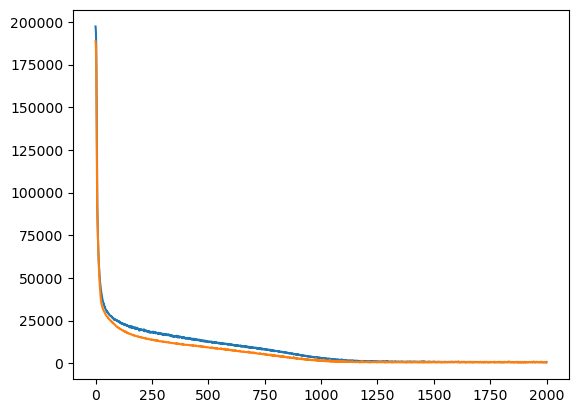

In [25]:
# plotting the history of epochs for rmse(test) and rmse(train)
# since the dataset is small, the diminishing return is after the 1250-th epoch (enough for training this model)
plt.plot(final.history['rmse'])
plt.plot(final.history['val_rmse'])
plt.show()

In [26]:
# making predictions for all x and calculating rmse (744)
predictions=model_final.predict(X)
rmse(Y,predictions)

46/46 [==============================] - 0s 810us/step


<tf.Tensor: shape=(), dtype=float32, numpy=546.5144>

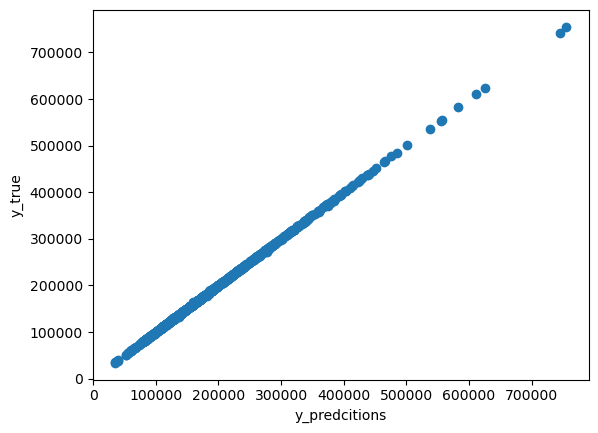

In [27]:
# plotting the final results
plt.scatter(Y,predictions)
plt.xlabel('y_predcitions')
plt.ylabel('y_true')
plt.show()